## 군집분석(K-평균 군집화)

In [1]:
# 경고(warning) 비표시 
import warnings
warnings.filterwarnings('ignore')

## Data 수집

In [2]:
import pandas as pd
import math

retail_df = pd.read_excel('Data/Online_Retail.xlsx')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
retail_df = retail_df[retail_df['Quantity'] > 0 ]

In [6]:
retail_df.count()

InvoiceNo      531285
StockCode      531285
Description    530693
Quantity       531285
InvoiceDate    531285
UnitPrice      531285
CustomerID     397924
Country        531285
dtype: int64

In [7]:
retail_df = retail_df[retail_df['UnitPrice'] > 0 ]

In [8]:
retail_df.count()

InvoiceNo      530104
StockCode      530104
Description    530104
Quantity       530104
InvoiceDate    530104
UnitPrice      530104
CustomerID     397884
Country        530104
dtype: int64

In [9]:
retail_df = retail_df[retail_df['CustomerID'] .notnull() ]

In [10]:
retail_df.count()

InvoiceNo      397884
StockCode      397884
Description    397884
Quantity       397884
InvoiceDate    397884
UnitPrice      397884
CustomerID     397884
Country        397884
dtype: int64

In [11]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [12]:
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [13]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [14]:
print(retail_df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [15]:
print(retail_df.shape)

(397884, 8)


In [17]:
retail_df.drop_duplicates(inplace = True)

In [18]:
print(retail_df.shape)

(392692, 8)


## 제품수, 거래 건수, 고객수 탐색

In [19]:
pd.DataFrame([{'Product':len(retail_df['StockCode'].value_counts()),
              'Transaction':len(retail_df['InvoiceNo'].value_counts()),
              'Customer':len(retail_df['CustomerID'].value_counts())}], 
             columns = ['Product', 'Transaction', 'Customer'],
            index = ['counts'])

,Product,Transaction,Customer
counts,3665,18532,4338


In [20]:
retail_df['Country'].value_counts()

Country
United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [21]:
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom


In [22]:
retail_df['SaleAmount'] = retail_df['UnitPrice'] * retail_df['Quantity']

In [23]:
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [24]:
a = {'InvoiceNo' : 'count',  'SaleAmount' : 'sum', 'InvoiceDate' : 'max' }

In [25]:
customer_df = retail_df.groupby('CustomerID').agg(a)
customer_df.head(3)

,InvoiceNo,SaleAmount,InvoiceDate
CustomerID,,,
12346,1,77183.60,2011-01-18 10:01:00
12347,182,4310.00,2011-12-07 15:52:00
12348,31,1797.24,2011-09-25 13:13:00


In [26]:
customer_df = customer_df.reset_index()

In [27]:
customer_df.head(3)

,CustomerID,InvoiceNo,SaleAmount,InvoiceDate
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00


In [28]:
customer_df = customer_df.rename ( columns = {'InvoiceNo' : 'Freq', 'InvoiceDate' : 'ElapsedDays'})

In [29]:
customer_df.head(3)

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00


In [31]:
import datetime

customer_df['ElapsedDays']  =  datetime.datetime(2011,12,10) - customer_df['ElapsedDays']

In [32]:
customer_df.head(3)

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,325 days 13:59:00
1,12347,182,4310.00,2 days 08:08:00
2,12348,31,1797.24,75 days 10:47:00


In [33]:
customer_df['ElapsedDays']  =  customer_df['ElapsedDays'].apply(lambda x: x.days+1)

In [34]:
customer_df.head(3)

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,326
1,12347,182,4310.00,3
2,12348,31,1797.24,76


## 분포 확인

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

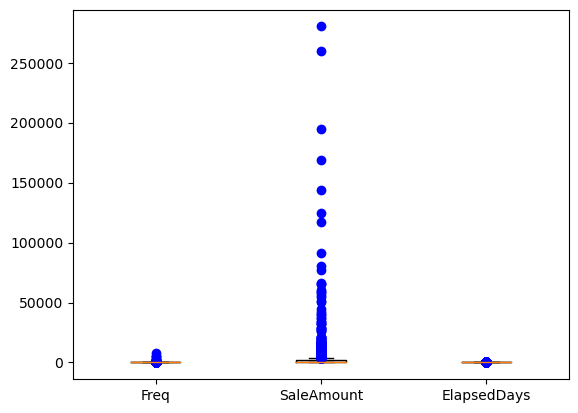

In [37]:
plt.boxplot([customer_df['Freq'], customer_df['SaleAmount'], 
                                            customer_df['ElapsedDays']], sym='bo')
plt.xticks([1, 2, 3], ['Freq', 'SaleAmount','ElapsedDays' ])

plt.show()

##  sym='bo' : 이상치를 blue색상, 동그라미로 표시 (symbol의 약자), r+ (red +기호), gx(green x기호)...
## 데이터 값이 많이 치우쳐있는 것을 알 수 있음.

In [40]:
# 치우침 줄이기 위해서 log 함수 값으로..
import numpy as np

customer_df['Freq_log'] = np.log1p(customer_df['Freq'])
customer_df['SaleAmount_log'] = np.log1p(customer_df['SaleAmount'])                                     
customer_df['ElapsedDays_log'] = np.log1p(customer_df['ElapsedDays'])
                                           
customer_df.head(3)                                          

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log
0,12346,1,77183.60,326,0.693147,11.253955,5.789960
1,12347,182,4310.00,3,5.209486,8.368925,1.386294
2,12348,31,1797.24,76,3.465736,7.494564,4.343805


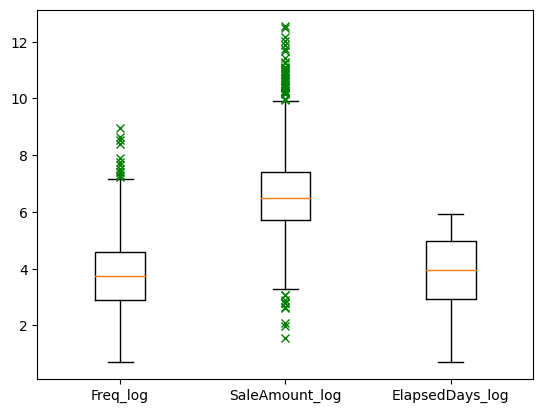

In [42]:
plt.boxplot([customer_df['Freq_log'], customer_df['SaleAmount_log'], 
                                            customer_df['ElapsedDays_log']], sym='gx')
plt.xticks([1, 2, 3], ['Freq_log', 'SaleAmount_log','ElapsedDays_log' ])

plt.show()

## 모델 구축

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [46]:
X_features = customer_df[['Freq_log', 'SaleAmount_log','ElapsedDays_log']].values

In [47]:
X_features

array([[ 0.69314718, 11.25395523,  5.78996017],
       [ 5.20948615,  8.36892517,  1.38629436],
       [ 3.4657359 ,  7.49456369,  4.34380542],
       ...,
       [ 2.56494936,  5.1876651 ,  2.19722458],
       [ 6.58202514,  7.62390095,  1.60943791],
       [ 4.26267988,  7.51658563,  3.78418963]])

In [48]:
from sklearn.preprocessing import StandardScaler ##  표준화를 위해 임포트

X_features_scaled = StandardScaler().fit_transform(X_features)
X_features_scaled

array([[-2.43820181,  3.7077163 ,  1.47888429],
       [ 1.18898578,  1.41490344, -1.89064214],
       [-0.21146474,  0.72002428,  0.37233877],
       ...,
       [-0.9349095 , -1.11333158, -1.27014755],
       [ 2.29130702,  0.82281217, -1.71990073],
       [ 0.42858139,  0.73752572, -0.05585907]])

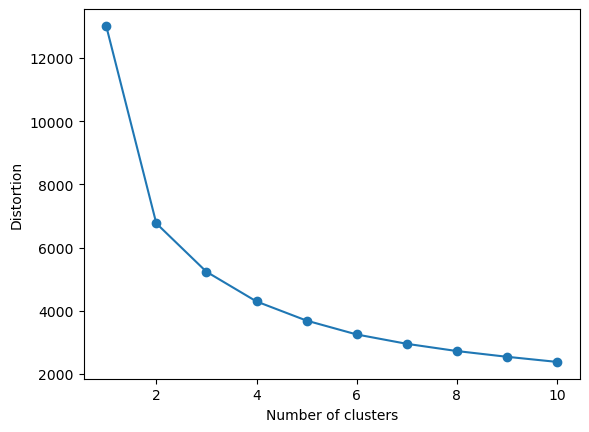

In [51]:
## 최적의 K 찾기( Cluster 수) , 일보우 방법 (기울기가 완만해지는 지범 ; 3 또는 4 로 선택)

from sklearn.cluster import KMeans

d = []

for i in range(1, 11):
    kmeans_i = KMeans(n_clusters=i, random_state=0)  # 모델 생성
    kmeans_i.fit(X_features_scaled)   # 모델 훈련
    d.append(kmeans_i.inertia_) # y 축의 값이 inertia value ( 분산까지의 거리 )
    
plt.plot(range(1,11), d, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [54]:
##그룹화 (cluster 갯수 4로)

kmeans = KMeans(n_clusters = 4, random_state = 0 ) # 그룹 4개로 지정 클러스터 모델구축
Y_labels = kmeans.fit_predict(X_features_scaled) # Clustering 실행
Y_labels

array([0, 3, 0, ..., 2, 3, 0])

In [55]:
## 데이터에 clUSTER lABEL 생성
customer_df['ClusterLabel'] = Y_labels
customer_df.head(3)

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,326,0.693147,11.253955,5.789960,0
1,12347,182,4310.00,3,5.209486,8.368925,1.386294,3
2,12348,31,1797.24,76,3.465736,7.494564,4.343805,0


In [56]:
## 최적의 K 찾기( Cluster 수) , 실루엣 갯수

from sklearn.cluster import KMeans

from matplotlib import cm
from sklearn.metrics import silhouette_samples


def silhouetteViz(n_cluster, X_features): 
    
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)
    
    ## Silhouette 값(실루엣 계수) 계산
    ## 실루엣계수 : -1~1 사이 값으로, 1에 가까울수록 군집화가 잘 된 것으로 평가
    silhouette_values = silhouette_samples(X_features, Y_labels, metric='euclidean')
    
    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouettes)
    
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title('Number of Cluster : '+ str(n_cluster)+'\n' \
              + 'Silhouette Score : '+ str(round(silhouette_avg,3)))
    plt.yticks(y_ticks, range(n_cluster))   
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

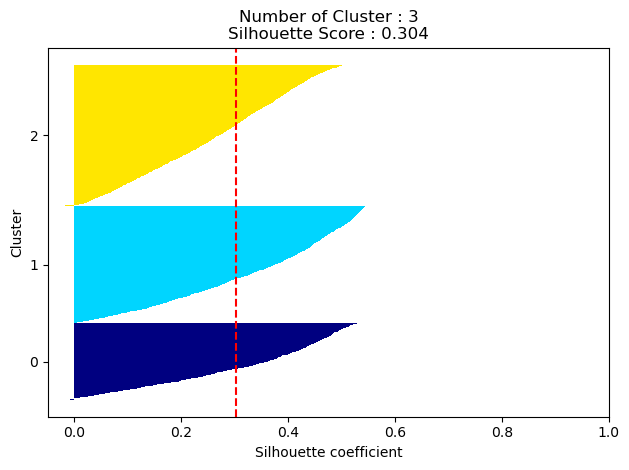

In [63]:
silhouetteViz(3,X_features_scaled) # Cluster 3개인 경우의 실루엣, Score 가 1에 가까울 수록 좋다

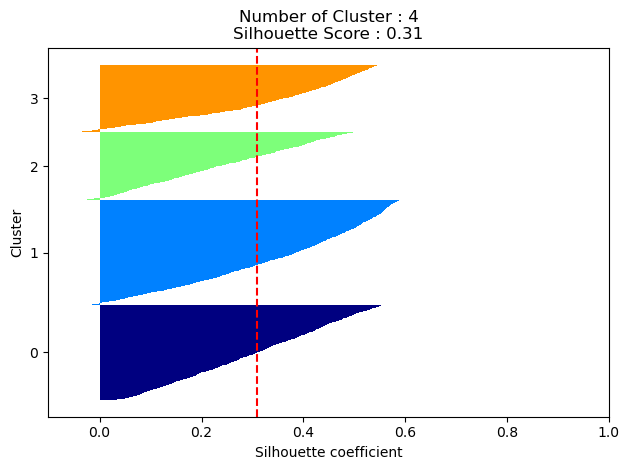

In [59]:
silhouetteViz(4,X_features_scaled) 

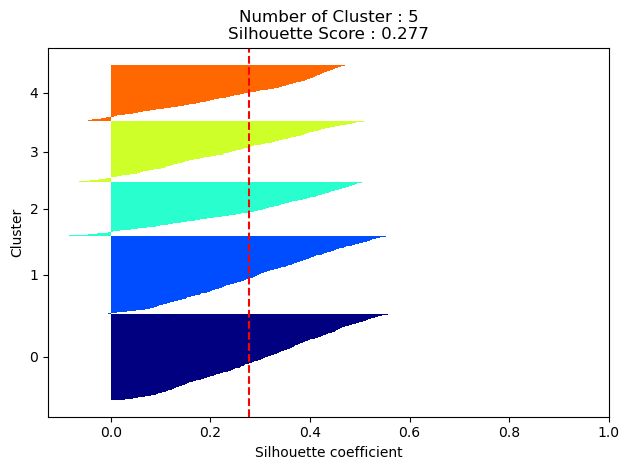

In [60]:
silhouetteViz(5,X_features_scaled) 

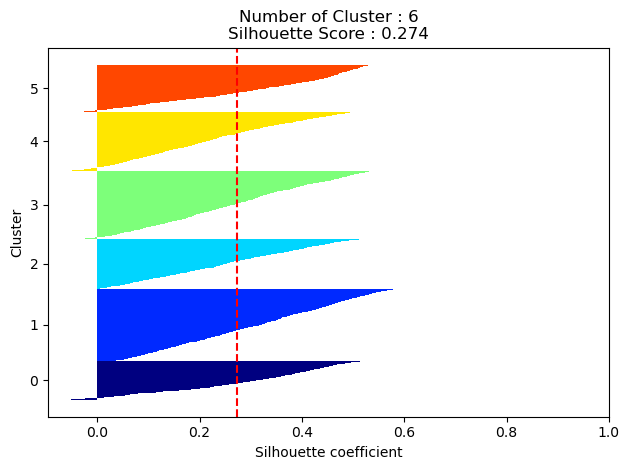

In [61]:
silhouetteViz(6,X_features_scaled) 

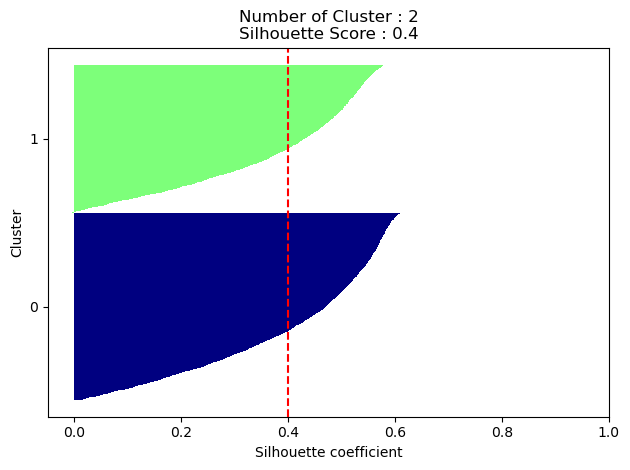

In [62]:
silhouetteViz(2,X_features_scaled) 

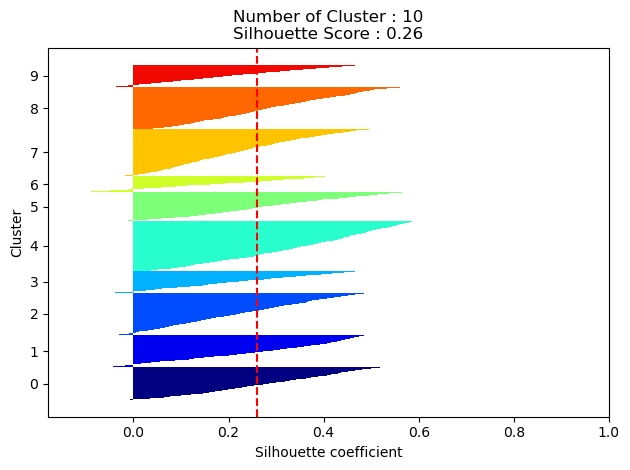

In [65]:
silhouetteViz(10,X_features_scaled) 